#This project is planned by Anar Jafarli and Shahbaz



---


**NOTE!**
⤵

---
- **All the Images/Data is taken by Anar Jafarli and Shahbaz!**

- **All the code is written explicitely WITHOUT GPT!(with the guide of Professor Dr. Felix Voigtlaender's google colab notebooks: [➡➡➡➡Click to see ⬅⬅⬅⬅](https://colab.research.google.com/drive/1EdzuYCT16r3IStkknMBx1OJm8NViu_I-?usp=sharing)**

- **The project is purely for educational and motivational purposes!**





##Image classification in Ingolstadt, Germany

Model used: CNN

Context of the project:
1) Custom Data Collection
2) Preparing the input Data
3) Create the architechture of the network
4) Train
5) Hope for the best

### Brief Information





We went to Ingolstadt which is located in Bayern, Germany and took multiple images of some buildings near the Catholic University of Eichstaet-Ingolstadt. Our plan is to create and deploy a model/platform which will be able to classify the images/photos taken by your phone such that the true label/name or information of the object in the photo is already predicted by our machine learning model. The categories/objects that this project is intented to be focused on are some famous buildings near the KU, namely, the following buildings:


---
1) Georganium
2) Entrance door of the Georganium building
3) The seminar room(201-203) in the Georganium
4) The basement room in Georgianum
5) The pink building in front of Georgianum
6) The church to the way to mensa from Georgianum
7) The kreuztor to the way to the main building of KU
8) The main entrance of the KU(x80 bus-stop)
9) The main building(hauptbau) of the KU from the wfi building
10) The WFI building from the main building of the KU


---
The goal and motive of the project comes from the motivation and interest to 'Deep Learning' course taught by [Professor Dr. Felix Voigtlaender](https://www.ku.de/news/prof-dr-felix-voigtlaender-erster-inhaber-des-lehrstuhls-fuer-reliable-machine-learning) and [Dr. Hannes Matt](https://www.ku.de/mgf/mathematik/lehrstuehle-professuren/lehrstuhl-fuer-reliable-machine-learning/team-des-lehrstuhls#c92388) at [Katholische Universität Eichstätt-Ingolstadt](https://www.ku.de/mids/professuren-des-instituts).





### Custom Data/Image Collection

> We came to Ingolstadt near the MIDS building and took images of the famous buildings which are mentioned above. We approximately took 130 images per category.



> We also took into consideration the potential path of people walking nearby these buildings and potential realistic image shootings in these pathes, this is why for each category we have decided to mimic the potential walking person who is willing to scan the building by taking a photo in his/her phone of the interested object/building which he/she wants to get some information about.

> Accordingly, we have started taking similar potential photos from these path ways for each category with different angles and distances.

> We have in total of **2670** images


---
- The original image dimension is 4864x3648
- The image type is JPG
- 21 Categories with some being a subset of one big class(e.g.,'georgianum'
'georgianum 1'
'georgianum 2'
'georgianum 3')


---






# Important Imports
⬇

In [ ]:
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import Accuracy, F1Score, Precision, Recall
from keras.optimizers import SGD, Adam, Adagrad, RMSprop, Nadam, AdamW


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Name of the categories:
"rozvu" means the pink building in front of the Georgianum

In [ ]:
import os
directory_path = r'/content/drive/MyDrive/31 dekabr/Deep Learning'
if os.path.isdir(directory_path):
    folder_contents = os.listdir(directory_path)
    print(f"Contents of '{directory_path}':")
    for item in folder_contents:
        print(item)
else:
    print(f"Error: '{directory_path}' is not a valid directory.")

Contents of '/content/drive/MyDrive/31 dekabr/Deep Learning':
wfi
hauptbau
wfi 1
ku
kreuztor
kreuztor 1
kreuztor 2
castle
castle 1
castle 2
georgianum
georgianum 1
georgianum 2
georgianum 3
rozvu
entrance
room
room 1
basement
rozvu 1
rozvu 2


### Prepare the Data

- Resize the original dimension 4864x3648 to 224x168

- Specify the batch size = 32

- Use of **keras.utils.image_dataset_from_directory()** function for accessing the data/images, splitting to training and validation, using **subset="training" and subset="validation"** for train and validation split respectively so that the splitting is handled smoothly and correctly by Keras, specifying the image size which is the desired resize size, setting the batch size parameter and also importantly setting the **color_mode** parameter to "rgb"

- Normalize the images, meaning, divide all pixel values by 255 to bring it between 0 and 1



In [ ]:
import tensorflow as tf
from tensorflow import keras

DATA_DIR = r"/content/drive/MyDrive/31 dekabr/Deep Learning"
IMG_SIZE = (224, 168)
BATCH = 32
SEED = 42

# 1) Train split
train_ds = keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,# 80%% train
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    color_mode="rgb"# ensures (H,W,3)
)

#2) Validation split
val_ds = keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,# same split rule
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    color_mode="rgb"
)

print("Classes:", train_ds.class_names)
num_classes = len(train_ds.class_names)

# 3) Normalize
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32)/255.0, y))
val_ds   = val_ds.map(lambda x, y: (tf.cast(x, tf.float32)/255.0, y))

#4) Speed, this is not thatimportant but recommended
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds.prefetch(tf.data.AUTOTUNE)

Found 2522 files belonging to 21 classes.
Using 2018 files for training.
Found 2522 files belonging to 21 classes.
Using 504 files for validation.
Classes: ['basement', 'castle', 'castle 1', 'castle 2', 'entrance', 'georgianum', 'georgianum 1', 'georgianum 2', 'georgianum 3', 'hauptbau', 'kreuztor', 'kreuztor 1', 'kreuztor 2', 'ku', 'room', 'room 1', 'rozvu', 'rozvu 1', 'rozvu 2', 'wfi', 'wfi 1']


In [ ]:
for images, labels in train_ds.take(1):
    print(images.shape)

(32, 224, 168, 3)


In [ ]:
from keras.src.losses import loss
from keras.src.optimizers import optimizer
model= keras.Sequential([layers.Input(shape=(224,168,3)),#224,168,3
                  layers.Conv2D(filters=32,kernel_size=(3,3), padding="same",activation="relu",kernel_initializer="he_normal",strides=(1,1)),#parameter size is 3x3x3x32 +32bias=896 parameters in 1st layer
                  layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),#112x84x32 <- this is the output size,
                  layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",kernel_initializer="he_normal"),#3x3x32x64+64=18496
                  layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),#56x42x64 <-output,
                  layers.Conv2D(filters=128,kernel_size=(3,3), strides=(1,1),activation="relu",kernel_initializer="he_normal",padding="same"),#3x3x64x128+128=73856
                  layers.MaxPool2D(pool_size=(2,2),strides=(2,2)), #28x21x128<-outpute
                  # layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer="he_normal", strides=(1,1)),
                  # layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
                  # layers.Conv2D(filters=512,kernel_size=(3,3), padding="same",activation="relu",kernel_initializer="he_normal",strides=(1,1)),
                  # layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
                  # layers.Conv2D(filters=1024,kernel_size=(3,3), padding="same",activation="relu",kernel_initializer="he_normal",strides=(1,1)),
                  # layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
                  # layers.Conv2D(filters=2048,kernel_size=(3,3), padding="same",activation="relu",kernel_initializer="he_normal",strides=(1,1)),
                  # layers.MaxPool2D(pool_size=(2,2),strides=(2,3)),
                  # layers.Conv2D(filters=4096,kernel_size=(3,3), padding="same",activation="relu",kernel_initializer="he_normal",strides=(1,1)),
                  # layers.MaxPool2D(pool_size=(2,2),strides=(2,1)),#19x19 after this maxpool
                  layers.Flatten(),#75264 input dimensions
                  # layers.Dense(512,activation="relu",kernel_initializer="he_normal"),#512x361+512bias
                  # layers.Dense(1024,activation="relu",kernel_initializer="he_normal"),#1024x512+1024
                  layers.Dense(64,activation="relu",kernel_initializer="he_normal"),#64x75264 + 64 bias=4816960 parameters in the 1st layer of te MLP
                  layers.Dense(21,activation="softmax")])#21x64 +21 bias = 1365 PARAMETERS IN THE LAST LAYER
model.compile(optimizer=SGD(learning_rate=0.0001,momentum=0.9, nesterov=True),
              loss=SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

early=EarlyStopping(monitor="val_loss",
                    patience=15,
                    restore_best_weights=True)

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=30,
          callbacks=early)


Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1110s 17s/step - accuracy: 0.1175 - loss: 2.9682 - val_accuracy: 0.1250 - val_loss: 2.7152
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 581s 9s/step - accuracy: 0.2813 - loss: 2.5085 - val_accuracy: 0.4683 - val_loss: 2.1494
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 645s 10s/step - accuracy: 0.5374 - loss: 1.9942 - val_accuracy: 0.4980 - val_loss: 1.7479
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 634s 10s/step - accuracy: 0.6220 - loss: 1.5801 - val_accuracy: 0.6171 - val_loss: 1.3886
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 647s 10s/step - accuracy: 0.7290 - loss: 1.1723 - val_accuracy: 0.6667 - val_loss: 1.0811
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 641s 10s/step - accuracy: 0.7960 - loss: 0.8807 - val_accuracy: 0.7421 - val_loss: 0.8667
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 639s 10s/step - accuracy: 0.8452 - loss: 0.6729 - val_accuracy: 0.7877 - val_loss: 0.8139
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 590s 9s/step - accuracy: 0.8763 - loss: 0.5644 - val_accuracy: 0.8

### Saving for the first time

In [ ]:
model.save("/content/drive/MyDrive/31 dekabr/Deep Learning/my_model.keras")

In [ ]:
model.save_weights(
    "/content/drive/MyDrive/31 dekabr/Deep Learning/my_weights.weights.h5"
)

In [ ]:
model.save("/content/drive/MyDrive/31 dekabr/Deep Learning/my_model.h5")

In [ ]:
model.save("ku_21class_model.keras")

In [ ]:
model.save("ku_21class_model.h5")

from google.colab import files
files.download("ku_21class_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save_weights("ku_weights.weights.h5")

from google.colab import files
files.download("ku_weights.weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json

with open("class_names.json", "w") as f:
    json.dump(folder_contents, f)

from google.colab import files
files.download("class_names.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Evaluation

In [ ]:
loss, acc = model.evaluate(val_ds)
print("Validation Loss:", loss)
print("Validation Accuracy:", acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 123s 8s/step - accuracy: 0.9849 - loss: 0.0896
Validation Loss: 0.09025747328996658
Validation Accuracy: 0.9841269850730896


In [ ]:
class_names = [
'basement', 'castle', 'castle 1', 'castle 2', 'entrance',
'georgianum', 'georgianum 1', 'georgianum 2', 'georgianum 3',
'hauptbau', 'kreuztor', 'kreuztor 1', 'kreuztor 2',
'ku', 'room', 'room 1',
'rozvu', 'rozvu 1', 'rozvu 2',
'wfi', 'wfi 1'
]

In [ ]:
import os

DATA_DIR = "/content/drive/MyDrive/31 dekabr/Deep Learning"
class_names = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])

print("Num classes:", len(class_names))
print(class_names)

Num classes: 21
['basement', 'castle', 'castle 1', 'castle 2', 'entrance', 'georgianum', 'georgianum 1', 'georgianum 2', 'georgianum 3', 'hauptbau', 'kreuztor', 'kreuztor 1', 'kreuztor 2', 'ku', 'room', 'room 1', 'rozvu', 'rozvu 1', 'rozvu 2', 'wfi', 'wfi 1']


### Predict One Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 5fb15263-ac74-4a8a-8dc7-e3602b312713.jpg to 5fb15263-ac74-4a8a-8dc7-e3602b312713 (4).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: hauptbau
Confidence: 0.52104473


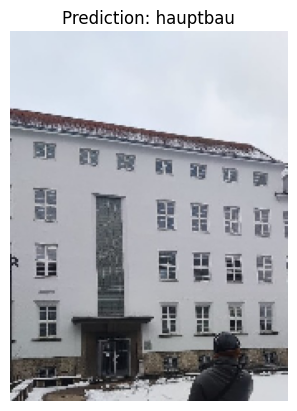

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(224,168))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
pred_class = np.argmax(pred)
confidence = np.max(pred)

print("Predicted class:", class_names[pred_class])
#print("Predicted class:", train_ds.class_names[pred_class])
print("Confidence:", confidence)

plt.imshow(img)
plt.title(f"Prediction: {class_names[pred_class]}")
plt.axis("off")
plt.show()

### Predicted Multiple Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


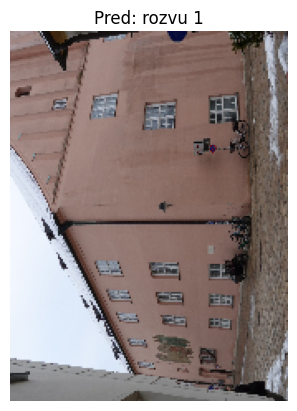

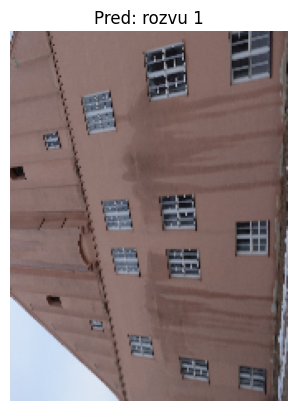

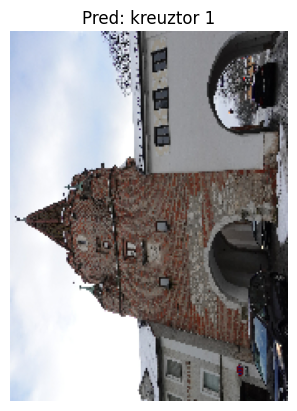

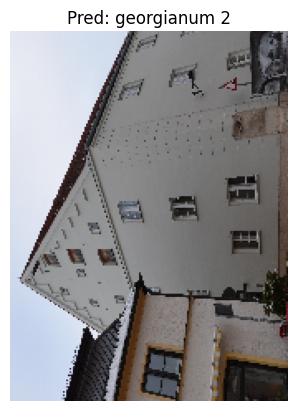

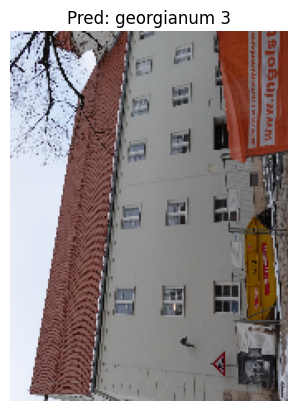

In [ ]:
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    pred_classes = np.argmax(preds, axis=1)

    for i in range(5):
        plt.imshow(images[i])
        plt.title(f"Pred: {class_names[pred_classes[i]]}")
        plt.axis("off")
        plt.show()

### Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


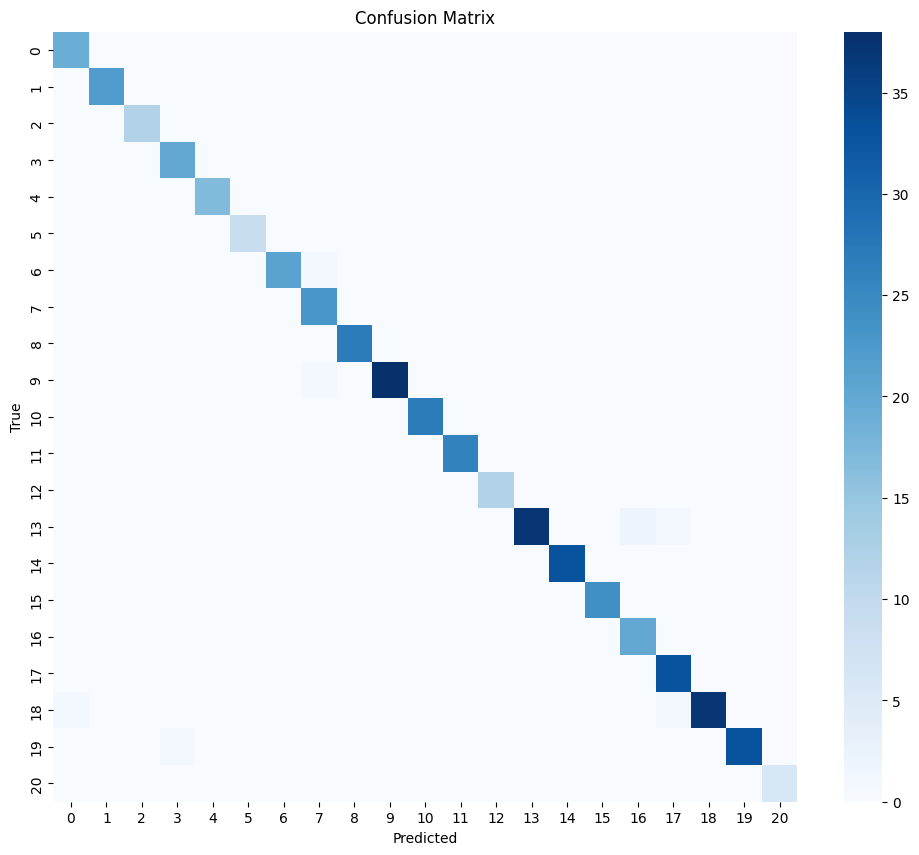

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(preds)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

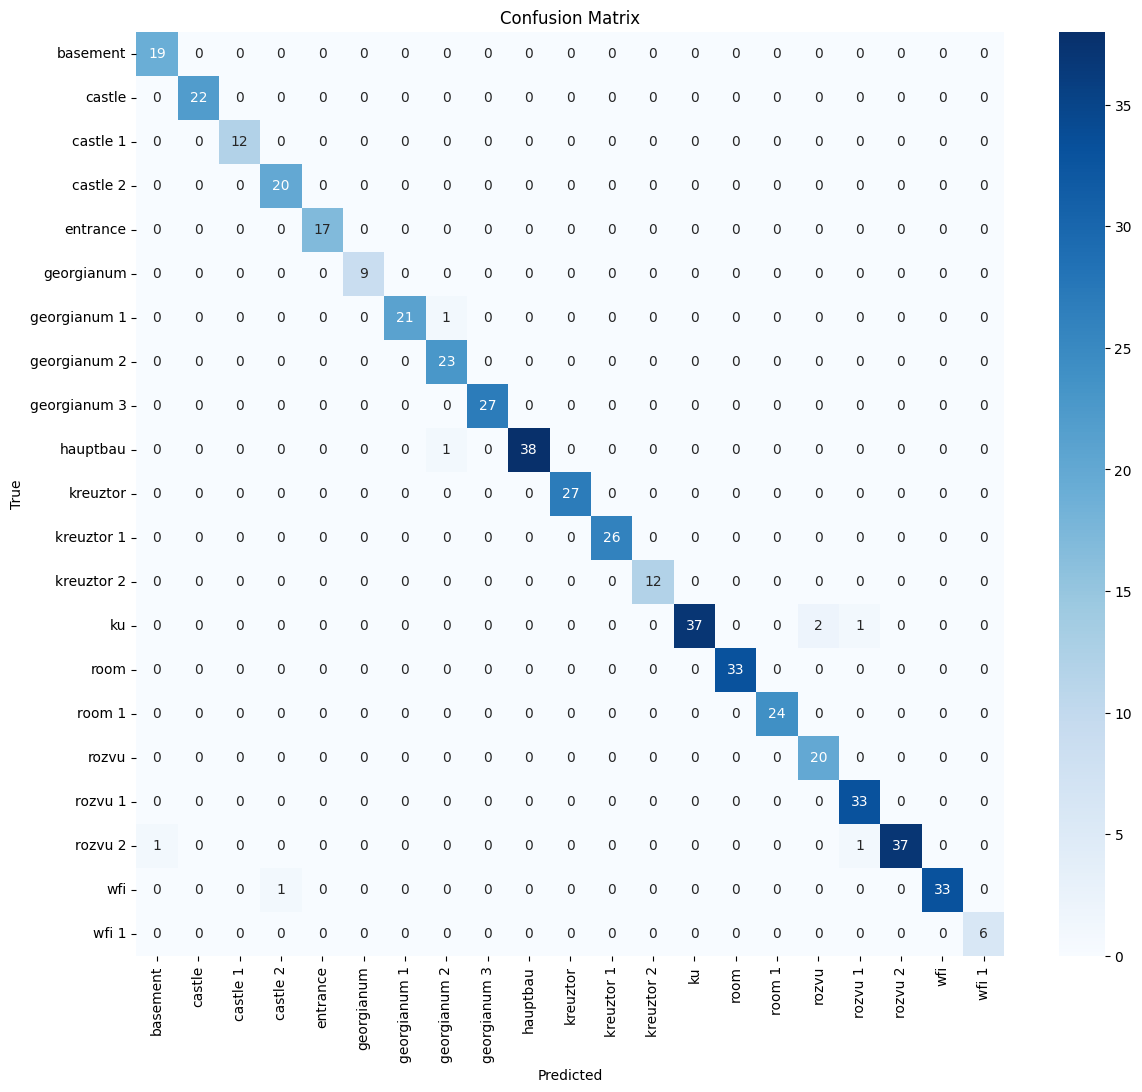

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    preds = np.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(preds)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(14,12))
sns.heatmap(
    cm,
    annot=True,        # <-- THIS prints numbers
    fmt="d",           # integer format
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

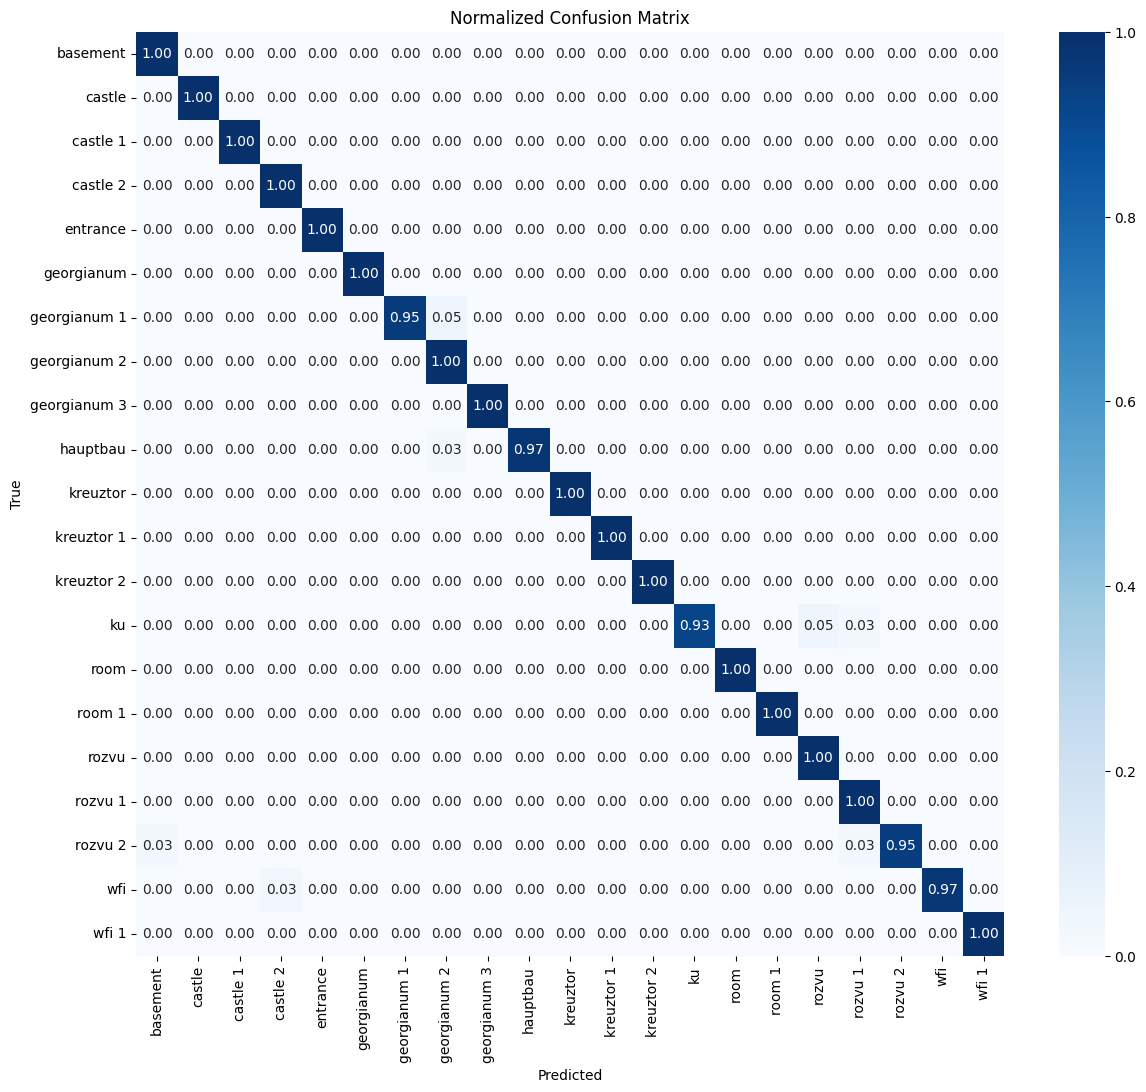

In [ ]:
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(14,12))
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt=".2f",      # 2 decimal places
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Per-class Precision / Recall / F1 (classification report)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

y_true = []
y_pred = []

for images, labels in val_ds:
    probs = model.predict(images, verbose=0)
    preds = np.argmax(probs, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

acc = accuracy_score(y_true, y_pred)
print("Validation Accuracy:", acc)

print("\nClassification Report (per-class Precision / Recall / F1):\n")
print(classification_report(
    y_true, y_pred,
    target_names=class_names,
    digits=4
))

Validation Accuracy: 0.9841269841269841

Classification Report (per-class Precision / Recall / F1):

              precision    recall  f1-score   support

    basement     0.9500    1.0000    0.9744        19
      castle     1.0000    1.0000    1.0000        22
    castle 1     1.0000    1.0000    1.0000        12
    castle 2     0.9524    1.0000    0.9756        20
    entrance     1.0000    1.0000    1.0000        17
  georgianum     1.0000    1.0000    1.0000         9
georgianum 1     1.0000    0.9545    0.9767        22
georgianum 2     0.9200    1.0000    0.9583        23
georgianum 3     1.0000    1.0000    1.0000        27
    hauptbau     1.0000    0.9744    0.9870        39
    kreuztor     1.0000    1.0000    1.0000        27
  kreuztor 1     1.0000    1.0000    1.0000        26
  kreuztor 2     1.0000    1.0000    1.0000        12
          ku     1.0000    0.9250    0.9610        40
        room     1.0000    1.0000    1.0000        33
      room 1     1.0000    1.0000 

### Per-class accuracy

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

per_class_acc = cm.diagonal() / cm.sum(axis=1)

print("\nPer-class accuracy:")
for i, name in enumerate(class_names):
    print(f"{name:15s}: {per_class_acc[i]:.4f}   (support={cm.sum(axis=1)[i]})")


Per-class accuracy:
basement       : 1.0000   (support=19)
castle         : 1.0000   (support=22)
castle 1       : 1.0000   (support=12)
castle 2       : 1.0000   (support=20)
entrance       : 1.0000   (support=17)
georgianum     : 1.0000   (support=9)
georgianum 1   : 0.9545   (support=22)
georgianum 2   : 1.0000   (support=23)
georgianum 3   : 1.0000   (support=27)
hauptbau       : 0.9744   (support=39)
kreuztor       : 1.0000   (support=27)
kreuztor 1     : 1.0000   (support=26)
kreuztor 2     : 1.0000   (support=12)
ku             : 0.9250   (support=40)
room           : 1.0000   (support=33)
room 1         : 1.0000   (support=24)
rozvu          : 1.0000   (support=20)
rozvu 1        : 1.0000   (support=33)
rozvu 2        : 0.9487   (support=39)
wfi            : 0.9706   (support=34)
wfi 1          : 1.0000   (support=6)


### Save the report to a text file in Drive

In [ ]:
report_text = classification_report(
    y_true, y_pred,
    target_names=class_names,
    digits=4
)

save_path = "/content/drive/MyDrive/31 dekabr/Deep Learning/val_classification_report.txt"
with open(save_path, "w") as f:
    f.write("Validation Accuracy: " + str(acc) + "\n\n")
    f.write(report_text)

print("Saved report to:", save_path)

Saved report to: /content/drive/MyDrive/31 dekabr/Deep Learning/val_classification_report.txt


In [ ]:
from sklearn.metrics import classification_report
from google.colab import files

report_text = classification_report(
    y_true, y_pred,
    target_names=class_names,
    digits=4
)

save_path = "val_classification_report.txt"

with open(save_path, "w") as f:
    f.write("Validation Accuracy: " + str(acc) + "\n\n")
    f.write(report_text)

print("Saved locally as:", save_path)

Saved locally as: val_classification_report.txt


In [ ]:
files.download("val_classification_report.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Full evaluation report folder

In [ ]:
import os, json, zipfile, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score
)

try:
    y_true
    y_pred
except NameError:
    y_true = []
    y_pred = []
    for images, labels in val_ds:
        probs = model.predict(images, verbose=0)
        preds = np.argmax(probs, axis=1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)


timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
report_dir = f"evaluation_report_{timestamp}"
os.makedirs(report_dir, exist_ok=True)

# ----------------------------
# 2) Compute metrics + classification report
# ----------------------------
acc = accuracy_score(y_true, y_pred)

report_dict = classification_report(
    y_true, y_pred,
    target_names=class_names,
    digits=4,
    output_dict=True
)

report_text = classification_report(
    y_true, y_pred,
    target_names=class_names,
    digits=4
)

# Save TXT
txt_path = os.path.join(report_dir, "classification_report.txt")
with open(txt_path, "w") as f:
    f.write(f"Validation Accuracy: {acc:.6f}\n\n")
    f.write(report_text)

# Save CSV (per-class rows)
# report_dict contains class rows + "accuracy", "macro avg", "weighted avg"
rows = []
for k, v in report_dict.items():
    if isinstance(v, dict):  # classes + macro/weighted avg
        rows.append({
            "class": k,
            "precision": v.get("precision", np.nan),
            "recall": v.get("recall", np.nan),
            "f1_score": v.get("f1-score", np.nan),
            "support": v.get("support", np.nan),
        })

df_metrics = pd.DataFrame(rows)
csv_path = os.path.join(report_dir, "metrics_per_class.csv")
df_metrics.to_csv(csv_path, index=False)

# Save summary JSON (overall)
summary = {
    "validation_accuracy": float(acc),
    "macro_avg": report_dict.get("macro avg", {}),
    "weighted_avg": report_dict.get("weighted avg", {}),
    "num_classes": len(class_names),
    "num_samples_val": int(len(y_true)),
}
json_path = os.path.join(report_dir, "summary.json")
with open(json_path, "w") as f:
    json.dump(summary, f, indent=2)

# ----------------------------
# 3) Save classification report as PDF (text rendered)
# ----------------------------
pdf_text_path = os.path.join(report_dir, "classification_report.pdf")

plt.figure(figsize=(11.69, 8.27))  # A4 landscape-ish
plt.axis("off")

full_text = f"Validation Accuracy: {acc:.6f}\n\n{report_text}"
plt.text(0.01, 0.99, full_text, va="top", ha="left", family="monospace", fontsize=9)
plt.tight_layout()
plt.savefig(pdf_text_path, format="pdf", bbox_inches="tight")
plt.close()

# ----------------------------
# 4) Confusion matrix with numbers -> PDF + PNG
# ----------------------------
cm = confusion_matrix(y_true, y_pred)

cm_png_path = os.path.join(report_dir, "confusion_matrix_numbers.png")
cm_pdf_path = os.path.join(report_dir, "confusion_matrix_numbers.pdf")

# Draw matrix with numbers using pure matplotlib (no seaborn needed)
fig = plt.figure(figsize=(14, 12))
ax = plt.gca()
im = ax.imshow(cm)  # don't set colors explicitly; defaults are fine

ax.set_title("Confusion Matrix (Counts)")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")

ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, rotation=90)
ax.set_yticklabels(class_names)

# Write counts inside each cell
# (If it becomes too crowded, you can later switch to only showing non-zero cells.)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        val = cm[i, j]
        if val != 0:  # write only non-zero to reduce clutter
            ax.text(j, i, str(val), ha="center", va="center", fontsize=7)

fig.colorbar(im, ax=ax)
plt.tight_layout()

plt.savefig(cm_png_path, dpi=200, bbox_inches="tight")
plt.savefig(cm_pdf_path, format="pdf", bbox_inches="tight")
plt.close()

# ----------------------------
# 5) Zip the whole folder and download
# ----------------------------
zip_path = f"{report_dir}.zip"
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as z:
    for root, _, filenames in os.walk(report_dir):
        for name in filenames:
            fullpath = os.path.join(root, name)
            arcname = os.path.relpath(fullpath, start=report_dir)
            z.write(fullpath, arcname=os.path.join(report_dir, arcname))

print("Created report folder:", report_dir)
print("Zipped to:", zip_path)

files.download(zip_path)

Created report folder: evaluation_report_20260221_204139
Zipped to: evaluation_report_20260221_204139.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Plot training curves (loss + accuracy)

History keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


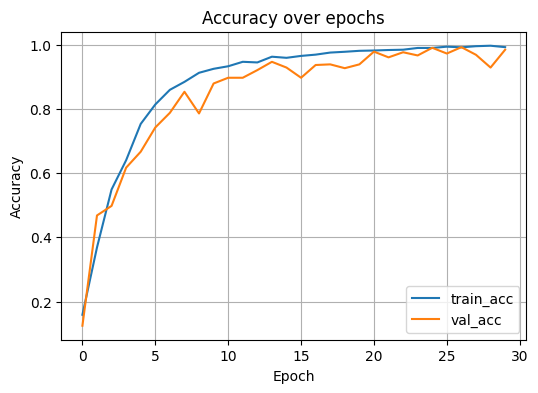

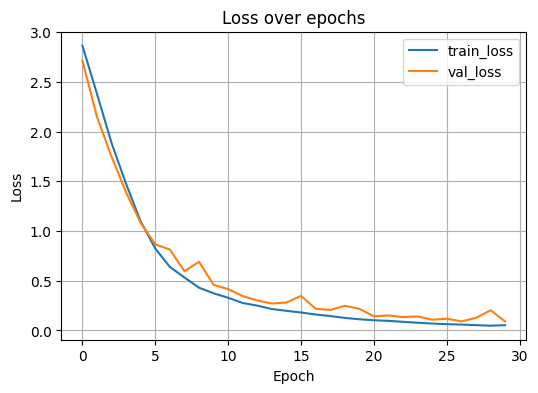

In [ ]:
import matplotlib.pyplot as plt

# If you accidentally had: history = model.fit(...),
# then history is a tuple like (History,)
if isinstance(history, tuple):
    history_obj = history[0]
else:
    history_obj = history

hist = history_obj.history
print("History keys:", hist.keys())

# Accuracy
plt.figure(figsize=(6,4))
plt.plot(hist.get("accuracy", []), label="train_acc")
plt.plot(hist.get("val_accuracy", []), label="val_acc")
plt.title("Accuracy over epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(hist.get("loss", []), label="train_loss")
plt.plot(hist.get("val_loss", []), label="val_loss")
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### Grad-CAM (see what the CNN looks at)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

last_conv_name = find_last_conv_layer(model)
print("Last Conv2D layer:", last_conv_name)

Last Conv2D layer: conv2d_2


In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Ensure model is built/called so model.outputs exists
    _ = model(tf.zeros((1, 224, 168, 3), dtype=tf.float32))

    last_conv_layer = model.get_layer(last_conv_layer_name)

    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[last_conv_layer.output, model.outputs[0]]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array, training=False)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_score = predictions[:, pred_index]

    grads = tape.gradient(class_score, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)
    return heatmap.numpy()

def show_gradcam_on_image(img, heatmap, alpha=0.4, title="Grad-CAM"):
    heatmap_resized = tf.image.resize(
        heatmap[..., np.newaxis],
        (img.shape[0], img.shape[1])
    ).numpy().squeeze()

    plt.figure(figsize=(6,4))
    plt.imshow(img)
    plt.imshow(heatmap_resized, alpha=alpha)
    plt.title(title)
    plt.axis("off")
    plt.show()

## Use Grad-CAM on an uploaded image

Saving 5fb15263-ac74-4a8a-8dc7-e3602b312713.jpg to 5fb15263-ac74-4a8a-8dc7-e3602b312713 (1).jpg
Pred: hauptbau confidence: 0.5210447311401367


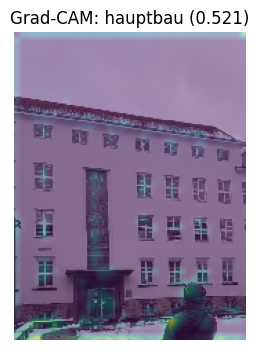

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# preprocess
img_pil = image.load_img(img_path, target_size=(224,168))
img_arr = image.img_to_array(img_pil) / 255.0
img_batch = np.expand_dims(img_arr, axis=0)

# predict
probs = model.predict(img_batch, verbose=0)[0]
pred_class = int(np.argmax(probs))
conf = float(np.max(probs))

print("Pred:", class_names[pred_class], "confidence:", conf)

# grad-cam
heatmap = make_gradcam_heatmap(img_batch, model, last_conv_name, pred_index=pred_class)
show_gradcam_on_image(img_arr, heatmap, title=f"Grad-CAM: {class_names[pred_class]} ({conf:.3f})")

### E

### Export the model (for deployment)

In [ ]:
from google.colab import files

model.save("ku_21class_model.keras")
files.download("ku_21class_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import keras
print("TF:", tf.__version__)
print("Keras:", keras.__version__)

TF: 2.19.0
Keras: 3.10.0


In [ ]:
import os, shutil

savedmodel_dir = "savedmodel_ku_21class"
if os.path.exists(savedmodel_dir):
    shutil.rmtree(savedmodel_dir)

model.export(savedmodel_dir)
print("✅ Exported SavedModel to:", savedmodel_dir)

Saved artifact at 'savedmodel_ku_21class'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 168, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 21), dtype=tf.float32, name=None)
Captures:
  137769103850960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103850576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103197008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103198160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103197776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103197392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103850384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103197584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103198736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103196624: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Exported

In [ ]:
import zipfile
from google.colab import files

zip_name = "savedmodel_ku_21class.zip"
with zipfile.ZipFile(zip_name, "w", zipfile.ZIP_DEFLATED) as z:
    for root, _, files_list in os.walk(savedmodel_dir):
        for f in files_list:
            full = os.path.join(root, f)
            z.write(full, os.path.relpath(full, start="."))

print("✅ Zipped to:", zip_name)
files.download(zip_name)

✅ Zipped to: savedmodel_ku_21class.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

model.save("ku_21class_model.keras")
files.download("ku_21class_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from google.colab import files

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

tflite_model = converter.convert()

with open("ku_21class_model_float16.tflite", "wb") as f:
    f.write(tflite_model)

files.download("ku_21class_model_float16.tflite")

Saved artifact at '/tmp/tmpf2xpa3uj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 168, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 21), dtype=tf.float32, name=None)
Captures:
  137769103850960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103850576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103197008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103198160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103197776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103197392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103850384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103197584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103198736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137769103196624: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### F
## Inference pipeline + mini “upload & predict Top-K” UI

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image_path(model, img_path, class_names, target_size=(224,168), top_k=3):
    img_pil = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img_pil) / 255.0
    x = np.expand_dims(x, axis=0)

    probs = model.predict(x, verbose=0)[0]
    top_idx = np.argsort(probs)[::-1][:top_k]

    results = [(class_names[i], float(probs[i])) for i in top_idx]
    return img_pil, results

Saving 5fb15263-ac74-4a8a-8dc7-e3602b312713.jpg to 5fb15263-ac74-4a8a-8dc7-e3602b312713 (3).jpg


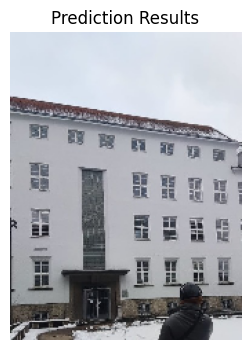

hauptbau         prob=0.5210
georgianum 1     prob=0.2554
basement         prob=0.1828
rozvu 1          prob=0.0130
rozvu 2          prob=0.0117
wfi              prob=0.0114
castle 1         prob=0.0023
wfi 1            prob=0.0021
georgianum 3     prob=0.0002
castle           prob=0.0001
entrance         prob=0.0000
ku               prob=0.0000
kreuztor         prob=0.0000
georgianum       prob=0.0000
castle 2         prob=0.0000
georgianum 2     prob=0.0000
room             prob=0.0000
kreuztor 1       prob=0.0000
rozvu            prob=0.0000
kreuztor 2       prob=0.0000
room 1           prob=0.0000


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

img_pil, results = predict_image_path(model, img_path, class_names, target_size=(224,168), top_k=21)

plt.figure(figsize=(6,4))
plt.imshow(img_pil)
plt.axis("off")
plt.title("Prediction Results")
plt.show()

for name, p in results:
    print(f"{name:15s}  prob={p:.4f}")

# Hide

In [ ]:
import tensorflow as tf
import numpy as np

def preprocess_keep_ratio(img_path, target_size=(224,168)):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)  # [0,1]

    target_h, target_w = target_size

    # Resize preserving aspect ratio so the shorter side matches
    img = tf.image.resize(img, [target_h, target_w], preserve_aspect_ratio=True)

    # Center-crop or pad to exact target
    img = tf.image.resize_with_crop_or_pad(img, target_h, target_w)

    img = tf.expand_dims(img, axis=0)
    return img

x = preprocess_keep_ratio(img_path, (224,168))
probs = model.predict(x, verbose=0)[0]
top3 = np.argsort(probs)[::-1][:3]

for i in top3:
    print(class_names[i], probs[i])

georgianum 1 0.9042511
rozvu 1 0.0761276
basement 0.010672407


# try outs

Saving 4f74b59b-e85d-4abf-921c-6b844c91bfd0.jpg to 4f74b59b-e85d-4abf-921c-6b844c91bfd0 (1).jpg


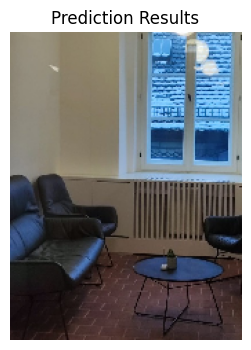

basement         prob=0.8536
castle 1         prob=0.1018
hauptbau         prob=0.0149
castle           prob=0.0109
wfi 1            prob=0.0095
wfi              prob=0.0030
georgianum 1     prob=0.0022
georgianum       prob=0.0016
rozvu 1          prob=0.0015
kreuztor         prob=0.0005
ku               prob=0.0002
entrance         prob=0.0001
rozvu 2          prob=0.0001
georgianum 3     prob=0.0000
castle 2         prob=0.0000
room             prob=0.0000
georgianum 2     prob=0.0000
kreuztor 2       prob=0.0000
rozvu            prob=0.0000
kreuztor 1       prob=0.0000
room 1           prob=0.0000


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

img_pil, results = predict_image_path(model, img_path, class_names, target_size=(224,168), top_k=21)

plt.figure(figsize=(6,4))
plt.imshow(img_pil)
plt.axis("off")
plt.title("Prediction Results")
plt.show()

for name, p in results:
    print(f"{name:15s}  prob={p:.4f}")

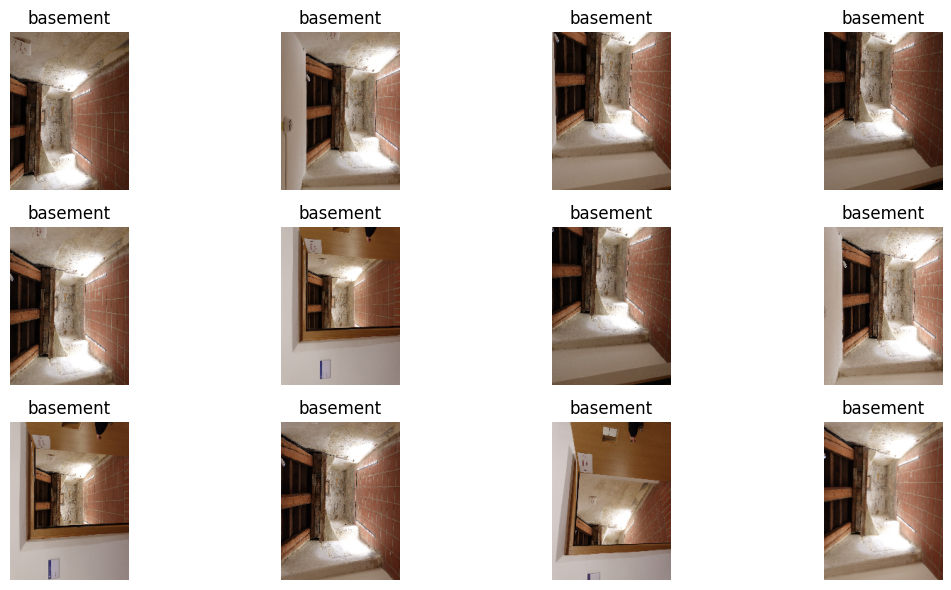

In [ ]:
import os, random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

DATA_DIR = "/content/drive/MyDrive/31 dekabr/Deep Learning"
basement_dir = os.path.join(DATA_DIR, "basement")

imgs = [f for f in os.listdir(basement_dir) if f.lower().endswith((".jpg",".jpeg",".png"))]
sample = random.sample(imgs, k=min(12, len(imgs)))

plt.figure(figsize=(12,6))
for i, fname in enumerate(sample):
    img = image.load_img(os.path.join(basement_dir, fname), target_size=(224,168))
    plt.subplot(3,4,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("basement")
plt.tight_layout()
plt.show()

### Label mismatch control

In [ ]:
import numpy as np

# show the first batch labels and their names
for images, labels in val_ds.take(1):
    labs = labels.numpy()[:10]
    print("First 10 label IDs:", labs)
    print("Mapped names:", [class_names[i] for i in labs])

First 10 label IDs: [ 1 13 19  8 10 17 17  6 18  1]
Mapped names: ['castle', 'ku', 'wfi', 'georgianum 3', 'kreuztor', 'rozvu 1', 'rozvu 1', 'georgianum 1', 'rozvu 2', 'castle']


In [ ]:
print(class_names)

['basement', 'castle', 'castle 1', 'castle 2', 'entrance', 'georgianum', 'georgianum 1', 'georgianum 2', 'georgianum 3', 'hauptbau', 'kreuztor', 'kreuztor 1', 'kreuztor 2', 'ku', 'room', 'room 1', 'rozvu', 'rozvu 1', 'rozvu 2', 'wfi', 'wfi 1']


### PHASE 2

### Retrain based on the previous saved model

### Upload the saved model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ku_21class_model (2).keras to ku_21class_model (2).keras


### Load the uploaded model and check the Architechture

In [ ]:
from tensorflow import keras

# Get uploaded filename automatically
model_filename = list(uploaded.keys())[0]

model = keras.models.load_model(model_filename)
print("✅ Loaded model:", model_filename)

model.summary()

✅ Loaded model: ku_21class_model (2).keras


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 168, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 84, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 84, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 42, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 75264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,816,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │         1,365 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,823,148 (37.47 MB)

 Trainable params: 4,911,573 (18.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,911,575 (18.74 MB)

### Rebuild dataset (from the dataset folder)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

DATA_DIR = r"/content/drive/MyDrive/31 dekabr/Deep Learning"  # adjust if needed
IMG_SIZE = (224, 168)
BATCH = 32
SEED = 42

train_ds_raw = keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH
)

val_ds_raw = keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH
)

class_names = train_ds_raw.class_names
num_classes = len(class_names)

train_ds = train_ds_raw.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y))
val_ds   = val_ds_raw.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y))

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds.prefetch(tf.data.AUTOTUNE)

Found 2522 files belonging to 21 classes.
Using 2018 files for training.
Found 2522 files belonging to 21 classes.
Using 504 files for validation.


### Train only head

Create “base” = everything except the last Dense layers

In [ ]:
# Freeze everything meaning i fix my trained weights and do not update them while backpropogation
# Take everything up to (but not including) the last 2 layers
base = keras.Sequential(model.layers[:-2], name="my_trained_base")

# Freeze base
base.trainable = False

### Check the output of the base model

In [ ]:
# must be (1,75264) because we actually flattened it in our base model
# this makes sence since our base is this:
# base = keras.Sequential(old_model.layers[:-2]) where we take the base until the last 2 layers where the last in this case is flatten() layer
dummy = tf.zeros((1,224,168,3))
out = base(dummy)
print("Base output shape:", out.shape)

Base output shape: (1, 75264)


### Add augmentation + NEW head (random init)

In [ ]:
from keras import layers

data_augment = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.08),
    layers.RandomZoom(0.10),
    layers.RandomTranslation(0.05, 0.05),
    layers.RandomContrast(0.15),
], name="augmentation")

num_classes = 21  # or len(class_names) if you have it

new_model = keras.Sequential([
    layers.Input(shape=(224,168,3)),
    data_augment,
    base,
    layers.Dense(128, activation="relu", kernel_initializer="he_normal"),  # NEW
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")                         # NEW
], name="base_plus_new_head")

new_model.summary()

Model: "base_plus_new_head"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)       │ (None, 224, 168, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_trained_base (Sequential)    │ (None, 75264)          │        93,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     9,633,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │         2,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,729,877 (37.12 MB)

 Trainable params: 9,636,629 (36.76 MB)

 Non-trainable params: 93,248 (364.25 KB)

### Train only the NEW head (base frozen)

In [ ]:
from tensorflow import keras
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
new_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
learningLRO=ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1)

history_head = new_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[early,learningLRO]
)

Epoch 1/15


KeyboardInterrupt: 

### Fine-tune: unfreeze part of the base

In [ ]:
base.trainable = True

# Fine-tune only the last part of the base
fine_tune_at = len(base.layers) - 3   # unfreeze last 3 layers of my base
for layer in base.layers[:fine_tune_at]:
    layer.trainable = False

new_model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

history_ft = new_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[early]
)